# Data Cleaning and Exploration Exercise From Mr Paschal

In [1]:
#install libraries
import pandas as pd
import numpy as np

In [2]:
#load the data
df = pd.read_excel('Killa.xlsx')
df.shape

(127, 3)

In [3]:
df.head()

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [4]:
#extract the first and the lastname
df2 = df[['First Name', 'Last Name']]
df2.head()

,First Name,Last Name
0,nooeukw,uuoaklowalb
1,angulbo,seagn
2,dukowi,eukloomja
3,ltuoawiob,uuilawobmn
4,nakuolo,donald


In [5]:
#extract the transaction column
df3 = df.drop(['First Name', 'Last Name'], axis='columns')
df3.head()

,transaction
0,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [6]:
df3.shape

(127, 1)

In [7]:
df3['transaction'][0]

"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['1992-11-10 00:00:00']}"

In [8]:
#get each data from the transaction column and put each in its respective column

df4 = pd.DataFrame()  #cretae an empty dataframe

for i in df3['transaction']:
    dict_format = eval(i)      #eval used to convert to dict
    dict_data = pd.DataFrame(dict_format)
    #print(dict_data)
    df4 = pd.concat([df4, dict_data ])
    #print(df4)
    

In [9]:
df4.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
0,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a
0,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
0,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a


In [10]:
df5 = df4.reset_index().drop('index', axis='columns')
df5.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a


In [11]:
#change n/a values to current datetime

df5.loc[df5['dob'] == 'n/a', 'dob'] = pd.datetime.now()
df5.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020-10-16 07:11:52.087454
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020-10-16 07:11:52.087454


In [12]:
#make a copy of df5
df6 = df5.copy()

In [13]:
#convert the dob to datatome
df6['dob'] = pd.to_datetime(df6['dob'])
df6.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00.000000
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020-10-16 07:11:52.087454
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00.000000
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00.000000
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020-10-16 07:11:52.087454


In [14]:
#extract the year 
df6['year_of_birth'] = pd.to_datetime(df6['dob']).dt.year
df6.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year_of_birth
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00.000000,1992
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020-10-16 07:11:52.087454,2020
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00.000000,1992
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00.000000,1981
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020-10-16 07:11:52.087454,2020


In [15]:
from datetime import date

#get the age
df6['age'] = pd.datetime.now().year - df6['year_of_birth']
df6.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year_of_birth,age
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00.000000,1992,28
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020-10-16 07:11:52.087454,2020,0
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00.000000,1992,28
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00.000000,1981,39
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020-10-16 07:11:52.087454,2020,0


In [20]:
# find the average age and replace with 0
age_list = []
for i in df6['age']:
    if df6['age'][i] != 0:
        age_list.append(df6['age'][i])
        
mean_age = int(np.mean(age_list))
mean_age

28

In [21]:
#fill the zero age with the mean of the other ages
df6['age'] = df6['age'].apply(lambda x : mean_age if x == 0 else x)
df6.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year_of_birth,age
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00.000000,1992,28
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020-10-16 07:11:52.087454,2020,28
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00.000000,1992,28
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00.000000,1981,39
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020-10-16 07:11:52.087454,2020,28


In [22]:
#drop the dob column

df7 = df6.drop('dob', axis='columns')
df7.head()

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,year_of_birth,age
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992,28
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020,28
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992,28
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981,39
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020,28


In [23]:
#concate with the first name and the last name
df8 = pd.concat([df2, df7], axis='columns')
df8

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,year_of_birth,age
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992,28
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020,28
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992,28
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981,39
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,2020,28
5,juagn,ahcnaiz,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,1980,40
6,eykeneowj,ijutdh,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1998,22
7,ellbo,sasahn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1976,44
8,ooadelb,ruktam,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1976,44
9,ali,grgniir kaeouakn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,2020,28


In [24]:
#save the excel copy
df8.to_excel('new_cleaned_data2.xlsx', index=False)

In [25]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (13,5)


Text(0.5, 1.0, 'Ages with there numbers')

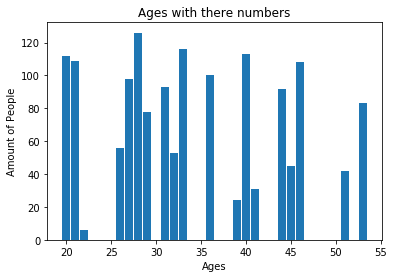

In [31]:
#plt.bar(df8['age'],)
y = np.arange(len(df8))
plt.bar(df8['age'], y, width=0.9)

plt.xlabel('Ages')
plt.ylabel('Amount of People')
plt.title('Ages with there numbers')

Predominant age groups
1. Late twenties (25 - 30)
2. Early thirties (30 - 35)
3. Mid forties (45)
4. Early twenties(20 - 25)
5. Forties (40)
6. Early Fifties (50 -55)

In [32]:

df8.groupby('bank_name')['tx_amount'].sum()

bank_name
ABank    1230240
GBank     948064
KBank     861521
QBank     198144
Name: tx_amount, dtype: int64

Obviously, the bank with the largest share is ABank

<BarContainer object of 127 artists>

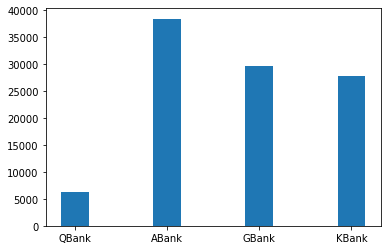

In [33]:
plt.bar(df8['bank_name'], df8['tx_amount'], width=0.3)

In [34]:
#Distribution of channels used on transaction

df8.groupby('tx_channel')['tx_channel'].count()

tx_channel
mobile    64
web       63
Name: tx_channel, dtype: int64

<BarContainer object of 127 artists>

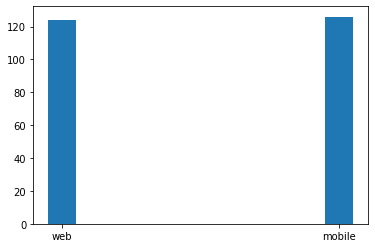

In [35]:
plt.bar(df8['tx_channel'], y, width=0.1)